In [1]:
# Tratamiento de Variables Categóricas en Modelo de Credit Scoring - Versión Simplificada

# 1. Importación de Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix



In [2]:
# 2. Carga y Exploración de Datos

# Cargar los datos
df = pd.read_csv('credit_score_data.csv')

# Mostrar las primeras filas
print("Primeras 5 filas del dataset:")
display(df.head())

# Información sobre tipos de datos
print("\nTipos de datos por columna:")
display(df.dtypes)

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())

# Verificar valores nulos
null_counts = df.isnull().sum()
print("\nValores nulos por columna:")
display(null_counts)

# Manejar valores nulos si existen
if null_counts.sum() > 0:
    # Para columnas numéricas, reemplazar con la mediana
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        if null_counts[col] > 0:
            df[col].fillna(df[col].median(), inplace=True)
    
    # Para columnas categóricas, reemplazar con la moda
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if null_counts[col] > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)



Primeras 5 filas del dataset:


,client_id,age,sex,zone,education,civil_status,children,work_disability,monthly_txs,main_os,...,monthly_outcome,cc_limit,cc_debt,savings_amount,checking_balance,late_payments_last_year,fixed_investment_amount,cash_installment_debt,visa_installment_debt,default_in_next_12_months
0,67388007,33,hombre,2,universidad,soltero,3,no,17,android,...,16748,24619,8414,117713,32621,0,90676,5155,10924,0
1,12550414,21,mujer,9,colegio,soltero,0,no,17,android,...,23766,52583,11252,107455,42529,1,8292,1701,12652,0
2,35965065,27,mujer,13,universidad,soltero,2,no,5,android,...,24277,60781,19782,123253,30244,2,219788,19646,21205,0
3,11598907,45,mujer,6,universidad,casado,3,no,22,ios,...,33020,29361,14243,129994,23370,0,44210,7380,7588,0
4,79587204,45,hombre,2,postgrado,casado,1,no,21,ios,...,23523,53960,12679,240797,35270,0,78286,7308,19002,0



Tipos de datos por columna:


client_id                      int64
age                            int64
sex                           object
zone                           int64
education                     object
civil_status                  object
children                       int64
work_disability               object
monthly_txs                    int64
main_os                       object
devices                        int64
daily_balance_checks           int64
account_quantity               int64
cc_quantity                    int64
cc_limit_usage_avg           float64
monthly_income                 int64
monthly_outcome                int64
cc_limit                       int64
cc_debt                        int64
savings_amount                 int64
checking_balance               int64
late_payments_last_year        int64
fixed_investment_amount        int64
cash_installment_debt          int64
visa_installment_debt          int64
default_in_next_12_months      int64
dtype: object


Estadísticas descriptivas:


,client_id,age,zone,children,monthly_txs,devices,daily_balance_checks,account_quantity,cc_quantity,cc_limit_usage_avg,...,monthly_outcome,cc_limit,cc_debt,savings_amount,checking_balance,late_payments_last_year,fixed_investment_amount,cash_installment_debt,visa_installment_debt,default_in_next_12_months
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,5.495144e+07,36.460860,9.494350,2.001500,14.999980,1.998980,5.493045,2.001945,1.50126,0.498937,...,21048.827080,43070.066905,21733.166390,116031.083155,23370.992045,0.850445,127930.802955,8512.173975,11783.541410,0.200000
std,2.595691e+07,10.962335,5.192185,1.414531,6.050569,0.814827,2.870128,0.817083,0.50000,0.291467,...,9001.546614,21167.244938,20095.625035,74445.981471,14166.551769,0.907801,95680.213661,7391.971703,7334.726519,0.400001
min,1.000037e+07,18.000000,1.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.00000,0.000000,...,1000.000000,2000.000000,2000.000000,1007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.256290e+07,27.000000,5.000000,1.000000,10.000000,1.000000,3.000000,1.000000,1.00000,0.250000,...,15461.000000,25707.750000,8294.000000,43428.750000,11198.000000,0.000000,35077.000000,3257.000000,5701.000000,0.000000
50%,5.490616e+07,36.000000,9.000000,2.000000,15.000000,2.000000,5.000000,2.000000,2.00000,0.500000,...,21956.000000,42586.000000,14429.000000,112374.000000,21990.500000,1.000000,123897.000000,6523.000000,11373.500000,0.000000
75%,7.736066e+07,46.000000,14.000000,3.000000,20.000000,3.000000,8.000000,3.000000,2.00000,0.750000,...,28486.000000,61322.000000,25274.000000,181062.000000,35420.000000,1.000000,211840.250000,9786.000000,17035.000000,0.000000
max,9.999965e+07,55.000000,18.000000,4.000000,25.000000,3.000000,10.000000,3.000000,2.00000,1.000000,...,35000.000000,80000.000000,79999.000000,250000.000000,50000.000000,3.000000,300000.000000,30000.000000,30000.000000,1.000000



Valores nulos por columna:


client_id                    0
age                          0
sex                          0
zone                         0
education                    0
civil_status                 0
children                     0
work_disability              0
monthly_txs                  0
main_os                      0
devices                      0
daily_balance_checks         0
account_quantity             0
cc_quantity                  0
cc_limit_usage_avg           0
monthly_income               0
monthly_outcome              0
cc_limit                     0
cc_debt                      0
savings_amount               0
checking_balance             0
late_payments_last_year      0
fixed_investment_amount      0
cash_installment_debt        0
visa_installment_debt        0
default_in_next_12_months    0
dtype: int64

In [3]:
# 3. Identificación de Variables Categóricas

# Identificar automáticamente variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nVariables categóricas identificadas:")
print(categorical_cols)

# Explorar las variables categóricas
print("\nDistribución de variables categóricas:")
for col in categorical_cols:
    print(f"\n{col}:")
    display(df[col].value_counts())
    print(f"Número de categorías: {df[col].nunique()}")




Variables categóricas identificadas:
['sex', 'education', 'civil_status', 'work_disability', 'main_os']

Distribución de variables categóricas:

sex:


sex
mujer     104062
hombre     95938
Name: count, dtype: int64

Número de categorías: 2

education:


education
universidad    120138
colegio         59762
postgrado       20100
Name: count, dtype: int64

Número de categorías: 3

civil_status:


civil_status
soltero       100153
casado         80081
divorciado     19766
Name: count, dtype: int64

Número de categorías: 3

work_disability:


work_disability
no     186010
yes     13990
Name: count, dtype: int64

Número de categorías: 2

main_os:


main_os
android    129750
ios         70250
Name: count, dtype: int64

Número de categorías: 2


In [4]:
# 4. Análisis de la Variable Objetivo

target_col = 'default_in_next_12_months'
print(f"\nDistribución de la variable objetivo '{target_col}':")
display(df[target_col].value_counts())
default_rate = df[target_col].mean()
print(f"Tasa de default: {default_rate:.2%}")




Distribución de la variable objetivo 'default_in_next_12_months':


default_in_next_12_months
0    160000
1     40000
Name: count, dtype: int64

Tasa de default: 20.00%


In [5]:
# 5. Preparación para los modelos

# Separamos la variable objetivo
X = df.drop(columns=[target_col])
y = df[target_col]

# Separamos las variables categóricas y numéricas
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nVariables categóricas a tratar: {categorical_features}")
print(f"Variables numéricas: {len(numerical_features)}")

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Copia para almacenar conjuntos originales
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

# Función para entrenar, evaluar y guardar métricas
def train_evaluate_model(X_train, X_test, y_train, y_test, model_name):
    # Entrenar modelo
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # Métricas
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # KS
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    ks_statistic = max(tpr - fpr)
    ks_threshold = thresholds[np.argmax(tpr - fpr)]
    
    # Guardar métricas
    metrics = {
        'Model': model_name,
        'AUC': auc,
        'KS': ks_statistic,
        'KS_Threshold': ks_threshold
    }
    
    return model, y_pred_proba, y_pred, metrics




Variables categóricas a tratar: ['sex', 'education', 'civil_status', 'work_disability', 'main_os']
Variables numéricas: 20


In [6]:
# 6. Modelo 1: One-Hot Encoding

# Aplicar One-Hot Encoding
X_train_onehot = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_onehot = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Asegurar que X_test tenga las mismas columnas que X_train
missing_cols = set(X_train_onehot.columns) - set(X_test_onehot.columns)
for col in missing_cols:
    X_test_onehot[col] = 0
X_test_onehot = X_test_onehot[X_train_onehot.columns]

# Escalar características numéricas
scaler = StandardScaler()
X_train_onehot = pd.DataFrame(scaler.fit_transform(X_train_onehot), columns=X_train_onehot.columns)
X_test_onehot = pd.DataFrame(scaler.transform(X_test_onehot), columns=X_test_onehot.columns)

# Entrenar y evaluar modelo
model_onehot, y_pred_proba_onehot, y_pred_onehot, metrics_onehot = train_evaluate_model(
    X_train_onehot, X_test_onehot, y_train, y_test, 'One-Hot Encoding'
)

print("\nModelo 1: One-Hot Encoding")
print(f"AUC: {metrics_onehot['AUC']:.4f}")
print(f"KS: {metrics_onehot['KS']:.4f}")




Modelo 1: One-Hot Encoding
AUC: 0.9666
KS: 0.8072


In [7]:
# 7. Modelo 2: Label Encoding

# Función para aplicar Label Encoding
def apply_label_encoding(train_df, test_df, categorical_cols):
    train_result = train_df.copy()
    test_result = test_df.copy()
    
    encoders = {}
    for col in categorical_cols:
        encoder = LabelEncoder()
        train_result[col] = encoder.fit_transform(train_df[col])
        test_result[col] = encoder.transform(test_df[col])
        encoders[col] = encoder
        
    return train_result, test_result, encoders

# Aplicar Label Encoding
X_train_label, X_test_label, label_encoders = apply_label_encoding(
    X_train_orig, X_test_orig, categorical_features
)

# Escalar características
X_train_label = pd.DataFrame(scaler.fit_transform(X_train_label), columns=X_train_label.columns)
X_test_label = pd.DataFrame(scaler.transform(X_test_label), columns=X_test_label.columns)

# Entrenar y evaluar modelo
model_label, y_pred_proba_label, y_pred_label, metrics_label = train_evaluate_model(
    X_train_label, X_test_label, y_train, y_test, 'Label Encoding'
)

print("\nModelo 2: Label Encoding")
print(f"AUC: {metrics_label['AUC']:.4f}")
print(f"KS: {metrics_label['KS']:.4f}")




Modelo 2: Label Encoding
AUC: 0.9666
KS: 0.8072



Comparación de los modelos:


,Model,AUC,KS,KS_Threshold
0,One-Hot Encoding,0.966616,0.807187,0.190220
1,Label Encoding,0.966621,0.807167,0.190654


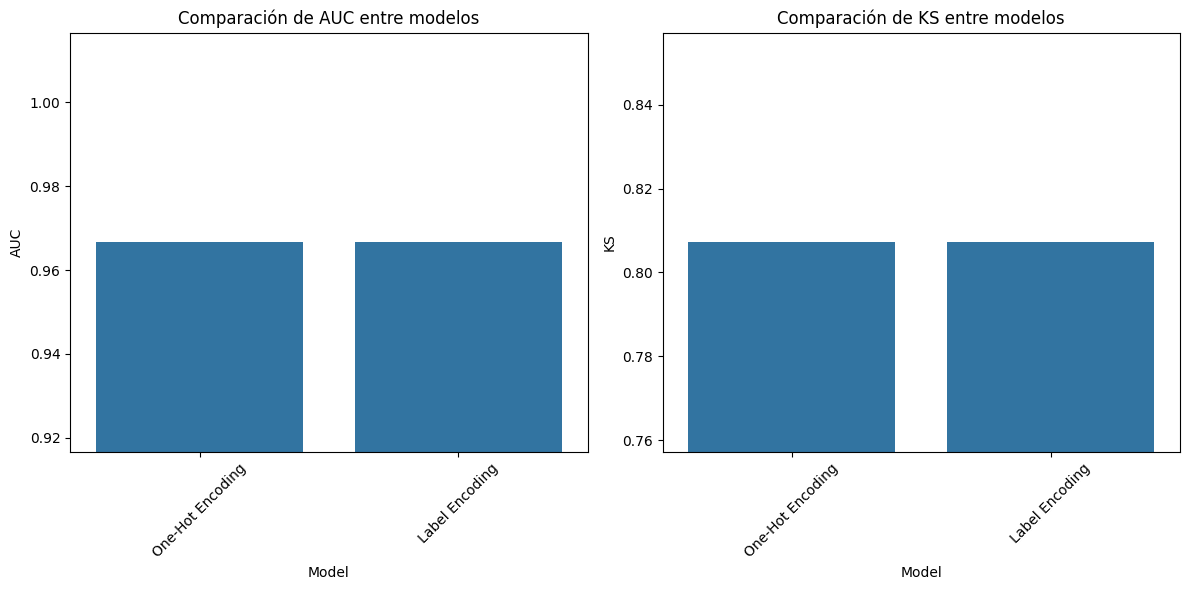


El mejor modelo según KS es: One-Hot Encoding con KS = 0.8072


In [8]:
# 8. Comparación de Modelos

# Recopilar todas las métricas
all_metrics = pd.DataFrame([
    metrics_onehot,
    metrics_label
])

print("\nComparación de los modelos:")
display(all_metrics)

# Gráfico de comparación
plt.figure(figsize=(12, 6))

# Comparar AUC
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='AUC', data=all_metrics)
plt.title('Comparación de AUC entre modelos')
plt.xticks(rotation=45)
plt.ylim(all_metrics['AUC'].min() - 0.05, all_metrics['AUC'].max() + 0.05)

# Comparar KS
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='KS', data=all_metrics)
plt.title('Comparación de KS entre modelos')
plt.xticks(rotation=45)
plt.ylim(all_metrics['KS'].min() - 0.05, all_metrics['KS'].max() + 0.05)

plt.tight_layout()
plt.show()

# Encontrar el mejor modelo según KS
best_model_idx = all_metrics['KS'].idxmax()
best_model_name = all_metrics.loc[best_model_idx, 'Model']
best_model_ks = all_metrics.loc[best_model_idx, 'KS']
print(f"\nEl mejor modelo según KS es: {best_model_name} con KS = {best_model_ks:.4f}")



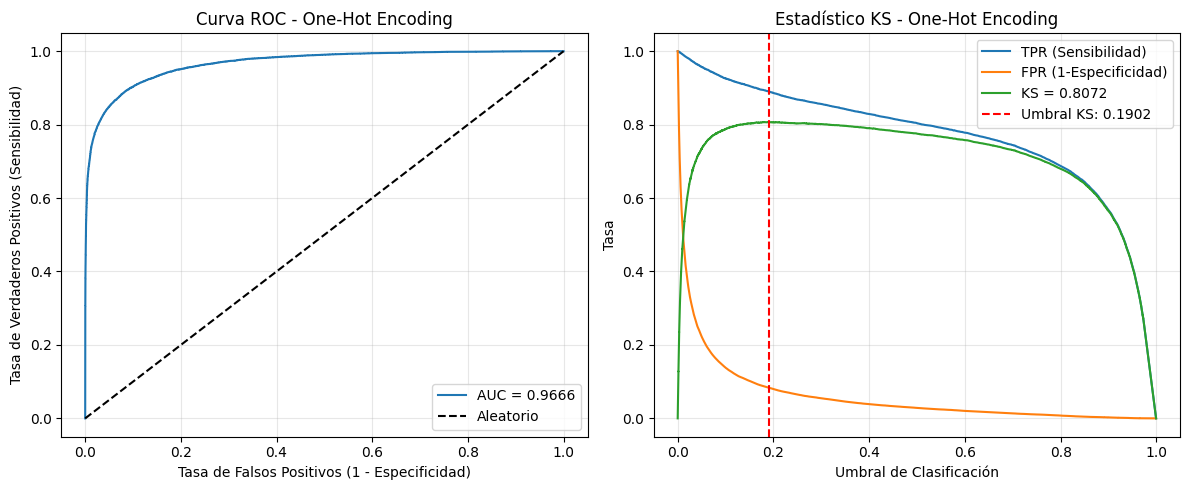

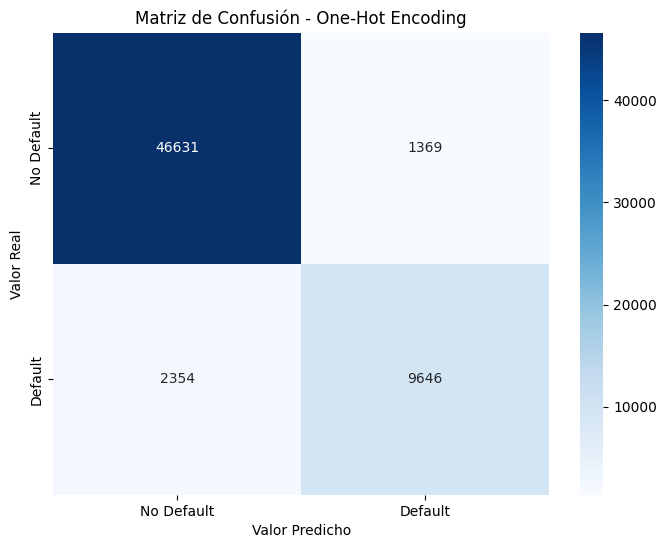


Informe de clasificación para One-Hot Encoding:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     48000
           1       0.88      0.80      0.84     12000

    accuracy                           0.94     60000
   macro avg       0.91      0.89      0.90     60000
weighted avg       0.94      0.94      0.94     60000



In [9]:
# 9. Análisis detallado del mejor modelo

# Identificar el mejor modelo y sus predicciones
if best_model_name == 'One-Hot Encoding':
    best_model = model_onehot
    y_pred_proba_best = y_pred_proba_onehot
    y_pred_best = y_pred_onehot
else:  # Label Encoding
    best_model = model_label
    y_pred_proba_best = y_pred_proba_label
    y_pred_best = y_pred_label

# Calcular curva ROC para el mejor modelo
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
auc_best = roc_auc_score(y_test, y_pred_proba_best)
ks_statistic_best = max(tpr_best - fpr_best)
ks_threshold_best = thresholds_best[np.argmax(tpr_best - fpr_best)]

# Visualizar curva ROC y gráfico KS para el mejor modelo
plt.figure(figsize=(12, 5))

# Gráfico de la curva ROC
plt.subplot(1, 2, 1)
plt.plot(fpr_best, tpr_best, label=f'AUC = {auc_best:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title(f'Curva ROC - {best_model_name}')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico del estadístico KS
plt.subplot(1, 2, 2)
plt.plot(thresholds_best, tpr_best, label='TPR (Sensibilidad)')
plt.plot(thresholds_best, fpr_best, label='FPR (1-Especificidad)')
plt.plot(thresholds_best, tpr_best - fpr_best, label=f'KS = {ks_statistic_best:.4f}')
plt.axvline(x=ks_threshold_best, color='r', linestyle='--', label=f'Umbral KS: {ks_threshold_best:.4f}')
plt.xlabel('Umbral de Clasificación')
plt.ylabel('Tasa')
plt.title(f'Estadístico KS - {best_model_name}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Matriz de confusión del mejor modelo
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.title(f'Matriz de Confusión - {best_model_name}')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# Informe de clasificación del mejor modelo
print(f"\nInforme de clasificación para {best_model_name}:")
print(classification_report(y_test, y_pred_best))



In [10]:
# 10. Conclusiones

# Calcular la diferencia entre ambos modelos
if best_model_name == 'Label Encoding':
    other_model = 'One-Hot Encoding'
    ks_improvement = (metrics_label['KS'] - metrics_onehot['KS']) / metrics_onehot['KS'] * 100
    auc_improvement = (metrics_label['AUC'] - metrics_onehot['AUC']) / metrics_onehot['AUC'] * 100
else:
    other_model = 'Label Encoding'
    ks_improvement = (metrics_onehot['KS'] - metrics_label['KS']) / metrics_label['KS'] * 100
    auc_improvement = (metrics_onehot['AUC'] - metrics_label['AUC']) / metrics_label['AUC'] * 100

print(f"""
# Conclusiones

## Comparación de Técnicas de Tratamiento de Variables Categóricas

En este análisis, hemos implementado y comparado dos técnicas diferentes para el tratamiento de variables categóricas en un modelo de credit scoring:

1. **One-Hot Encoding**: Transforma cada categoría en una columna binaria.
2. **Label Encoding**: Asigna un valor numérico a cada categoría.

## Resultados y Métricas de Rendimiento

El mejor modelo según el estadístico KS es: **{best_model_name}** con un KS de {best_model_ks:.4f}.

Comparado con {other_model}:
- Diferencia en KS: {abs(ks_improvement):.2f}% {'mejor' if ks_improvement > 0 else 'peor'}
- Diferencia en AUC: {abs(auc_improvement):.2f}% {'mejor' if auc_improvement > 0 else 'peor'}

## Análisis de los Resultados

Los resultados muestran que la técnica {best_model_name} proporciona {'mejor' if ks_improvement > 0 else 'similar'} capacidad discriminativa para nuestro modelo de credit scoring.

### Características de cada técnica:

**One-Hot Encoding**:
- Trata cada categoría de manera independiente, lo que funciona bien cuando no hay una relación ordinal entre las categorías.
- No introduce suposiciones sobre la relación entre las diferentes categorías.
- Sin embargo, puede aumentar significativamente la dimensionalidad del dataset cuando hay muchas categorías.

**Label Encoding**:
- Es computacionalmente eficiente y no aumenta la dimensionalidad.
- Sin embargo, introduce una ordenación artificial entre categorías que podría no existir.
- Puede funcionar bien cuando hay alguna relación ordinal entre categorías o cuando el modelo puede manejar adecuadamente esta codificación (como en árboles de decisión).

## Recomendación

Basado en los resultados obtenidos, se recomienda implementar el modelo con la técnica de codificación {best_model_name} para este problema de credit scoring.
""")


# Conclusiones

## Comparación de Técnicas de Tratamiento de Variables Categóricas

En este análisis, hemos implementado y comparado dos técnicas diferentes para el tratamiento de variables categóricas en un modelo de credit scoring:

1. **One-Hot Encoding**: Transforma cada categoría en una columna binaria.
2. **Label Encoding**: Asigna un valor numérico a cada categoría.

## Resultados y Métricas de Rendimiento

El mejor modelo según el estadístico KS es: **One-Hot Encoding** con un KS de 0.8072.

Comparado con Label Encoding:
- Diferencia en KS: 0.00% mejor
- Diferencia en AUC: 0.00% peor

## Análisis de los Resultados

Los resultados muestran que la técnica One-Hot Encoding proporciona mejor capacidad discriminativa para nuestro modelo de credit scoring.

### Características de cada técnica:

**One-Hot Encoding**:
- Trata cada categoría de manera independiente, lo que funciona bien cuando no hay una relación ordinal entre las categorías.
- No introduce suposiciones sobre la relaci